In [1]:
#We might also have cash flows that have a different r because the bank will pay more given longer term invests
#Such as CD products the penalize you if you take out money earlier but give a higher interest rate
#In this case we apply the different r for the different cash flows
#So a TVM equation where we give tuples of P, r, and t would look like
def TVM(cashflows):
    PV = 0
    for flow in cashflows:
        P = flow[0]
        r = flow[1]
        t = flow[2]
        PV_i = P/(1+r)**t
        PV+=PV_i
    return PV
PV = TVM([(100,.01,1),(200,.015,2),(100,.02,3)])
print(PV)

387.37448417423155


In [2]:
#Now, what is an annuity? It is a product where you get a payment for a set number of years
#So for example $100 in year 1, 2, 3, 4, 5
#Let's assume a constant r=5% and see how much this would be worth
PV = 0
for t in range(1,6):
    PV += 100/(1.05)**t
print(PV)

432.9476670630819


In [3]:
#In terms of future value, if we invested each cash flow at r=5% as we get it, we would have...
print(PV*(1.05)**5)

552.5631250000001


In [4]:
#Bringing back our timeline function
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,4]
def timelinePlot(periods,values):
    #Create our plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax)

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5)
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
    #Get rid of axes
    plt.axis('off')
    
    for value in values:
        #Plot a red dot on the year that our value is at
        plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
        #Plot the values above, use rounding to keep it clean
        plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

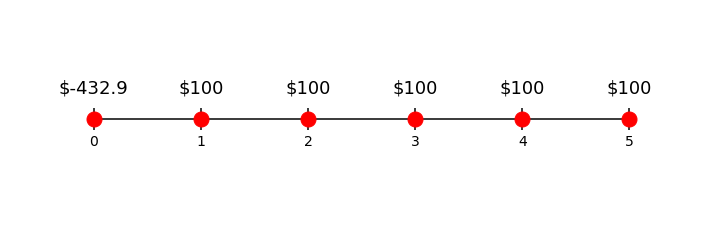

In [5]:
payments = [(-PV,0)]
for x in range(1,6):
    payments.append((100,x))

timelinePlot(5,payments)

In [6]:
#There is an equation which represents the present value of an annuity
#P is payment, n is the number of years, and r is our discount rate
def annuityTVM(P,n,r):
    annuityFactor = (1-(1+r)**-n)/r
    annuity = annuityFactor*P
    return annuity
print(annuityTVM(100,5,.05))

432.94766706308224


In [7]:
#Annuity factors discount the number of payments we get
#Look at how the factors vary based on different discount rates
rates = [0,.02,.05,.1]
n = 10
for r in rates:
    if r==0:
        annuityFactor = n
    else:
        annuityFactor = (1-(1+r)**-n)/r
    print(annuityFactor)

10
8.982585006242244
7.721734929184818
6.144567105704685


In [8]:
#Let's visualize how the rate r affects our annuity value
#The further out payments are hurt more by a higher rate of r since they are discounted more heavily
rates = [.02,.06,.12]
#The present value of each annuity for r equal to the three rates above
for r in rates:
    print(annuityTVM(100,5,r))

471.3459508504209
421.2363785565717
360.47762023450076


In [9]:
#What are the present values of the payments?
#Let's make a nested list where each inner list is the payment present values
data = []
for r in rates:
    PV = [100/(1+r)**t for t in range(1,6)]
    print(PV)
    data.append(PV)

[98.0392156862745, 96.11687812379854, 94.23223345470444, 92.38454260265142, 90.57308098299158]
[94.33962264150944, 88.99964400142399, 83.96192830323018, 79.20936632380204, 74.7258172866057]
[89.28571428571428, 79.71938775510203, 71.1780247813411, 63.55180784048311, 56.742685571859916]


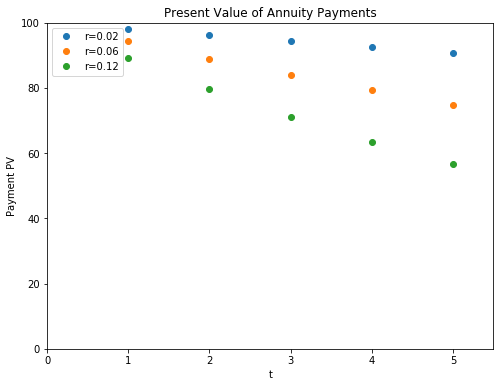

In [10]:
plt.rcParams["figure.figsize"] = [8,6]
#And now, let's graph them
for flows,r in zip(data,rates):
    #Use "o" so we get points instead of a line
    plt.plot(list(range(1,6)),flows,"o",label="r="+str(r))
    #Set the limits so that we have 0 as the left minimum and 5.5 as the right (so we don't cut off points)
    plt.xlim([0,5.5])
    plt.ylim([0,100])
plt.xlabel("t")
plt.ylabel("Payment PV")
plt.title("Present Value of Annuity Payments")
plt.legend()
plt.show()

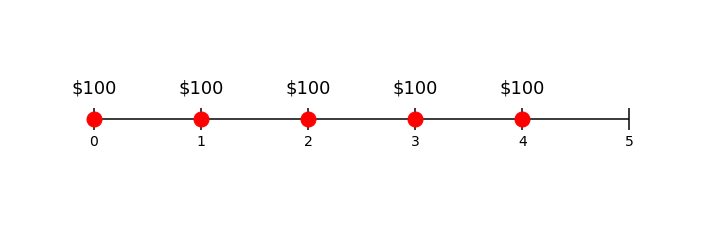

In [11]:
plt.rcParams["figure.figsize"] = [12,4]

#There is also a such thing as an annuity due, which is an annuity where you get your payment one period earlier
#So on a timeline an annuity due for 5 years would look like this
payments = []
for x in range(0,5):
    payments.append((100,x))

timelinePlot(5,payments)
#You immediately get money in period 0, but get none on period 5 since you already got your 5 payments

In [12]:
#How does this affect TVM? Well your first payment now has exactly $100 present value since you get it immediately
#Your second value was being discounted by t=2, but now you get it a period earlier, so it is only discounted by t=1
#And so on
#Let's take the example from before which was
PV = 0
for t in range(1,6):
    PV += 100/(1.05)**t
print(PV)

432.9476670630819


In [13]:
#now we have t-1 since we get them all a year early
PV = 0
for t in range(1,6):
    #Notice the t-1
    PV += 100/(1.05)**(t-1)
print(PV)

454.595050416236


In [14]:
#(1.05)**t-1 is equal to (1.05)**t * (1.05)**-1
#So we are dividing every payment by (1.05)**-1
#Or conversely multiplying every payment by (1.05)**1
#And we can actually pull it out of the summation since everything is multiplied by it
PV = 0
for t in range(1,6):
    PV += 100/(1.05)**t
print(PV)
print(PV*1.05)

432.9476670630819
454.595050416236


In [15]:
#So you can multiply an annuity by (1+r) or use the following equation
def annuityDue(P,n,r):
    annuityFactor = (1-(1+r)**-(n-1))/r
    annuity = annuityFactor*P+P
    return annuity
print(annuityDue(100,5,.05))

454.5950504162363


In [16]:
#We might also get an annuity that is semi-annual
#There are two kinds of r in this case, annualized meaning the return over a year, or non-annualized
#If the rate is 6% for example then...

In [17]:
#Annualized would mean that the interest earned over the 2 payments would equal 6%
#So $1000 paid semi-annually we have two payments
#First we would convert the annualized rate to the semi-annualized rate
r = (1.06)**.5-1
print(r)

0.02956301409869999


In [18]:
#Now, with the semi-annual rate, we compound by half years
#So while our payment is in period .5, we actually discount with 1 as t but r as 2.95%
p1 = 500/(1+r)**1
p2 = 500/(1+r)**2
print(p1+p2)

957.3410443861794


In [19]:
#If you want to still work in terms of years for annualized, you can also use t=.5 and t=1
r = .06
p1 = 500/(1+r)**.5
p2 = 500/(1+r)**1
print(p1+p2)
#Notice we get the same PV!

957.3410443861792


In [20]:
#So PV is 957.34, we can confirm that the annualized rate is 6%
#At t = .5, we would be getting 500 which we could then invest at a rate of 6%
#The future value of 500 at time t = .5 at t = 1 could be found by compounding by half a year the 6% interest rate
#At time t=1 we would also get 500
print(500*1.06**.5+500)

1014.78150704935


In [21]:
#So the future value of these two payments is 1014.78
#It is more than 1000 (the face value) or what we would get if it is annual because you can invest the coupon for half a year
#Now, if our future value is 1014.78 at t=1 and our PV is 957.34 at t=0, we can find the rate of return from the equation
print((500*1.06**.5+500)/(p1+p2))

1.06


In [22]:
#The point of an annualized rate is that it is what you will get in terms of yearly return
#If we had a rate that was not annualzied, a nominal rate, then we would just divide by the number of periods
#This is the agreement that you make, you get or pay interest n periods of interest with a rate of r/n per period
r = .06/2
p1 = 500/(1+r)**1
p2 = 500/(1+r)**2
print(p1+p2)
#The present value is now lower

956.7348477707607


In [23]:
#And now since we can still re-invest in the same way...
print((500*1.03+500)/(p1+p2))
#Our effective annual rate is 6.09%

1.0609


In [24]:
#If you have a rate that is not annualized, you can also annualize it then apply the formulas for annualized like before
r = .06
r = (1+r/2)**2-1
print(r)

0.060899999999999954


In [25]:
#So using the annualized rate on our PV
print((500*1.03+500))
print((p1+p2)*(1+r))
print(500*(1+r)**.5+500)

1015.0
1015.0
1015.0


In [26]:
#So now that we understand how this works, let's apply it to annuities
#Annualized rate of 6%, 1000 coupon, 5 years, 4 quarterly coupons
PV = 0
n = 5*4
r = .06
coupon = 1000/4
for x in range(1,n+1):
    t = x/4
    PV += coupon / (1+r)**t
print(PV)

4305.9914937938065


In [27]:
#Then way 1 to do nominal interest rates for the same
PV = 0
n = 5*4
r = .06/4
coupon = 1000/4
for x in range(1,n+1):
    t = x
    PV += coupon / (1+r)**t
print(PV)

4292.159696270487


In [28]:
#Or way 2 to do nominal interest rates for the same
PV = 0
n = 5*4
r = (1+.06/4)**4-1
coupon = 1000/4
for x in range(1,n+1):
    t = x/4
    PV += coupon / (1+r)**t
print(PV)

4292.159696270485


In [29]:
#For the annuity equations, we can change our rate to a semi-annual rate
#So for the annualized rate
r = (1.06)**.25-1
n = 5*4
coupon = 1000/4
print(annuityTVM(coupon,n,r))

4305.9914937938065


In [30]:
#Or for a simple rate
r = .06/4
n = 5*4
coupon = 1000/4
print(annuityTVM(coupon,n,r))

4292.159696270459
